# Week 3 - Gravity Gradients

This week focuses on the influence of **gravity gradients** on the motion of rigid bodies in space. Gravity gradient effects arise due to the differential gravitational force across an extended body. By approximating these effects to the first order, the module examines how they perturb both the attitude and orbital motion of spacecraft. 

A key outcome of this week is the derivation of gravity gradient relative equilibria conditions. These equilibria are analyzed for stability through linearization techniques, providing insights into how spacecraft orientation naturally evolves in response to Earth's gravity field. 

Understanding gravity gradients is particularly important for passive stabilization methods, where external forces like gravity are exploited to maintain a desired attitude with minimal control effort.

<ins>**Learning Objectives**</ins>

- Describe the effect of gravity gradients on the motion of bodies in space
- Derive and apply the **gravity gradient torque**
- Develop equations of motion for a rigid body with multiple spinning components

---

# 3.1) Gravity Gradient Torque Derivation

Objective: Derive the equation for $L_G$

**<ins>Understanding Gravity Gradient Torque in ADCS</ins>**

Gravity gradient torque is a crucial factor in **Attitude Determination and Control Systems (ADCS)**, as it arises naturally due to the variation in gravitational force across an extended rigid body in orbit. The Earth's gravity exerts a **differential pull** on different parts of the satellite, causing the **lower** portions to experience slightly stronger attraction than the **upper** portions.

This tidal force results in a restoring torque that aligns the satellite’s **principal axis of inertia** with the local vertical. For satellites such as the **Techsat 21 constellation**, gravity gradient stabilization was originally considered due to its **passive nature**, reducing the need for active control actuators.

Understanding this effect is critical in ADCS design because:
- It can be leveraged for **passive attitude stabilization**.
- It induces **unwanted torques** that may affect precision pointing.
- It influences **long-term attitude drift** and spacecraft orientation.

For missions requiring **high pointing accuracy**, proper modeling and mitigation of gravity gradient torque is essential.

<div align="center">
  <img src="Images/AmorphousPotato_GravityGradient.PNG" alt="Alt text" width="750"/>
</div>

## Step 1: Define the Gravitational Force Acting on a Mass Element

We consider the gravitational force acting on an extended body in space. The force acting on a small mass element within the spacecraft due to Earth's gravity is given by:

$$
d\mathbf{F}_G = -\frac{G M_e dm}{|\mathbf{R}|^2} \cdot \frac{\mathbf{R}}{\mathbf{|R|}} = -\frac{G M_e}{|\mathbf{R}|^3} \mathbf{R} dm
$$

where:
- $d\mathbf{F}_G$ is the differential force due to gravity acting on a differential mass element,
- $G$ is the gravitational constant,  
- $M_e$ is Earth's mass,  
- $\mathbf{R}$ is the position vector of the mass element relative to Earth's center,  
- $dm$ is the differential mass element

This expression is derived from **Newton’s law of universal gravitation**, which states that the gravitational force between two point masses is attractive and proportional to the inverse square of their separation.

The **negative sign** is physically significant: it ensures the direction of the force is **toward the source of gravity** (i.e., Earth’s center). Since force is a vector quantity, the equation must capture both the **magnitude** of the gravitational attraction and its **direction**, which is inward along $-\hat{\mathbf{R}}$.

## Step 2: Establish the Torque Generated by Differential Gravitational Forces

Since different parts of the spacecraft experience slightly different gravitational forces due to their spatial distribution, this results in a **torque** about the spacecraft’s center of mass $C$. The torque exerted by the differential gravitational force due to the distribution of the differential mass elements $dm$ is given by:

$$
\mathbf{L}_G = \int_B \mathbf{r} \times d\mathbf{F}_G
$$

where:
- $\mathbf{r}$ is the position vector of the mass element relative to the spacecraft center of mass,  
- The integral is taken over the entire spacecraft body $B$.  



## Step 3: Express the Gravity Gradient Torque in Terms of the Center of Mass

Substituting the gravitational force equation:

$$
\mathbf{L}_G = - \int_B \mathbf{r} \times \frac{G M_e}{|\mathbf{R}|^3} (\mathbf{R}_c + \mathbf{r}) \, dm
$$

where:
- $\mathbf{R}_c$ is the position vector of the spacecraft center of mass relative to Earth's center.  

This equation forms the basis for deriving the **gravity gradient torque**, which arises due to the differential gravitational attraction across the spacecraft. The torque tends to align the spacecraft's principal axis of inertia with the local vertical, a fundamental principle leveraged in **passive gravity-gradient stabilization**.

## Step 4: Extracting Constants from the Integral and setting the stage for the next steps...

We observe that $G$, $M_e$, and the position vector of the Centre of Mass, $\mathbf{R}_c$, are **constants** with respect to the integration over the body $B$.(Note that the variable here is $mathbf{r}$ as the integral over the body yields the body itself)

Also, we reverse the cross product order using the identity:

$$
\mathbf{a} \times \mathbf{b} = - \mathbf{b} \times \mathbf{a}
$$

to eliminate the negative sign. This gives:

$$
\mathbf{L}_G = G M_e \int_B \frac{1}{|\mathbf{R}|^3} (\mathbf{R}_c + \mathbf{r}) \times \mathbf{r} \, dm
$$

$$
\mathbf{L}_G = G M_e ( \int_B \frac{1}{|\mathbf{R}|^3} (\mathbf{R}_c \times \mathbf{r}) \, dm 
+
\underbrace{\int_B \frac{1}{|\mathbf{R}|^3} (\mathbf{r} \times \mathbf{r}) \, dm}_{= \, \mathbf{0}} )
$$

$$
\mathbf{L}_G = G M_e (\mathbf{R}_c \times \int_B \frac{\mathbf{r}}{|\mathbf{R}|^3}) \, dm
$$

## Step 5: Expanding the Denominator Using Taylor Series Approximation

To compute the gravity gradient torque, we need to expand the denominator $|\mathbf{R}|^{-3}$ in the integral expression. Since $\mathbf{R}$ consists of both the spacecraft center-of-mass position $\mathbf{R}_c$ and the relative position vector $\mathbf{r}$ of a mass element, we express:

$$
|\mathbf{R}|^{-3} = |\mathbf{R}_c + \mathbf{r}|^{-3}
$$

We use the Taylor series expansion to approximate $ |\mathbf{R}|^{-3} $ because the full expression is nonlinear and difficult to evaluate directly. Since $ \mathbf{r} $ is much smaller than $ \mathbf{R}_c $, we can expand the function around $ R_c $ and keep only the first-order terms. This simplifies the computation while maintaining accuracy for small perturbations, which is sufficient for spacecraft applications where the relative displacements within the body are small compared to the orbital radius.

Given that $\mathbf{r}$ is small compared to $\mathbf{R}_c$, we recall the **Taylor series expansion**, which allows us to approximate a function $f(x)$ around a reference point $x_0$ as:

$$
f(x) \approx f(x_0) + \frac{1}{1!} \left. \frac{df}{dx} \right|_{x = x_0} (x - x_0) + \frac{1}{2!} \left. \frac{d^2 f}{dx^2} \right|_{x = x_0} (x - x_0)^2 + \dots
$$

For our case, we define,

$$
f(r) = |R|^{-3}
$$

Since we are performing a Taylor series expansion around $ R_c $, we first examine the function **strictly at the center of mass**, meaning we set $r = 0$. This physically implies that we are **not considering any displacement of mass elements** within the spacecraft, but rather expanding about the reference point $ R_c $ alone.

With $ r = 0 $, the function simplifies to:

$$
|\mathbf{R}|^{-3} = R_c^{-3}
$$

We now proceed with the **first derivative** to capture how the function changes with respect to $r$.

$$
\frac{\partial}{\partial r} |\mathbf{R}|^{-3} = -3 R^{-4} \frac{\partial R}{\partial r}
$$

Now we will have to find the expression of $\frac{\partial R}{\partial r}$. This is found by taking the partial derivative of $R$ with respect to $r$ when the vector $R$ is dotted by itself. We differentiate $ R^2 $ instead of $ R $ directly to eliminate the need for the chain rule when handling square roots.

$$ 
R^2 = R \cdot R = (R_c + r) \cdot (R_c + r)
$$

Expanding the dot product:

$$
R^2 = R_c \cdot R_c + 2 R_c \cdot r + r \cdot r
$$

Differentiating both sides with respect to $r$:

$$ 
2R \frac{\partial R}{\partial r} = \frac{\partial}{\partial r} (R_c \cdot R_c + 2 R_c \cdot r + r \cdot r)
$$

Since $ R_c $ is constant with respect to $ r $, its derivative vanishes, simplifying to:

$$ 
2R \frac{\partial R}{\partial r} = 2R_c + 2r
$$

Solving for $ \frac{\partial R}{\partial r} $:

$$ 
\frac{\partial R}{\partial r} = \frac{R_c + r}{R}
$$

Now, using the chain rule to differentiate $ |\mathbf{R}|^{-3} $, we obtain:

$$
\frac{\partial}{\partial r} |\mathbf{R}|^{-3} = -3 R^{-4} \frac{\partial R}{\partial r}
$$

Substituting the previously derived expression, we get:

$$
\frac{\partial}{\partial r} |\mathbf{R}|^{-3} = -3 R^{-4} \cdot \frac{R_c + r}{R}
$$

which simplifies to:

$$
\frac{\partial}{\partial r} |\mathbf{R}|^{-3} = -3 R^{-5} (R_c + r)
$$

Finally, evaluating this at $ r = 0 $:

$$
\left. \frac{\partial f}{\partial r} \right|_{r = 0} = \frac{-3}{(R_c)^5} R_c
$$

Now, recall that we are using the first-order Taylor series expansion to approximate $ f(r) = |\mathbf{R}|^{-3} $ at $ r = 0 $:

$$
f(r) = (R_c + r)^{-3}
$$

Substituting the first-order expansion:

$$
f(r) \approx f(r = 0) + \left. \frac{\partial f}{\partial r} \right|_{r = 0} \cdot r
$$

From our earlier derivation:

$$
\left. \frac{\partial f}{\partial r} \right|_{r = 0} = \frac{-3}{(R_c)^5} R_c
$$

Evaluating at $ r = 0 $:

$$
f(r = 0) = (R_c)^{-3}
$$

Thus, the first-order approximation is:

$$
f(r) \approx \frac{1}{(R_c)^3} + \frac{-3}{(R_c)^5} R_c \cdot r
$$

Factoring out $ \frac{1}{(R_c)^3} $:

$$
f(r) \approx \frac{1}{(R_c)^3} \left( 1 - \frac{3 R_c \cdot r}{(R_c)^2} + \dots \right)
$$

This result provides the **first-order approximation** of $ |\mathbf{R}|^{-3} $ using Taylor expansion, where higher-order terms are neglected for small perturbations $ r \ll R_c $.

While this was an extensive step-by-step derivation using the **Taylor series expansion** to find the first-order approximation of $ |\mathbf{R}|^{-3} $, we can also obtain the same result using the **binomial expansion**.

The **binomial expansion** states that for small $ x $:

$$
(1 + x)^n \approx 1 + n x + \mathcal{O}(x^2) \quad \text{for } |x| \ll 1.
$$

Applying this directly to:

$$
|\mathbf{R}|^{-3} = (R_c^2 + 2 R_c \cdot r + r^2)^{-3/2}
$$

yields the same first-order approximation as before.

The key difference between the **Taylor series** and **binomial expansion** is:
- **Taylor series** expands any function around a reference point and requires computing derivatives.
- **Binomial expansion** is a special case of the Taylor series applied to expressions of the form $ (1 + x)^n $, making it a more direct approach when applicable.

In this case, both methods give the same result, but the **binomial expansion** provides a quicker way to approximate the function for small $ r/R_c $.

## Step 6: Finding the Gravity Gradient Torque

From Step 4, we know:

$$
\mathbf{L}_G = G M_e \mathbf{R}_c \times \int_B \frac{\mathbf{r}}{|\mathbf{R}|^3} dm
$$

Subsituting the expression we have found for $|\mathbf{R}|^-3$,

$$
\mathbf{L}_G = G M_e \mathbf{R}_c \times \int_B \mathbf{r} \left( \frac{1}{(R_c)^3} \left( 1 - \frac{3 R_c \cdot r}{(R_c)^2} \right) \right) dm
$$

$$
\mathbf{L}_G = \frac {G M_e}{(R_c)^3} \mathbf{R}_c \times \int_B \mathbf{r} \left( 1 - \frac{3 R_c \cdot r}{(R_c)^2} \right) dm
$$

Using the **center of mass definition**, we recall that the integral of the position vector $\mathbf{r}$ over the entire body mass is zero:

$$
\int_B \mathbf{r} \, dm = 0
$$

Thus, the gravity gradient torque expression simplifies to:

$$
\mathbf{L}_G = \frac{3 G M_e}{R_c^5} \mathbf{R}_c \times \int_B -\mathbf{r} (\mathbf{r} \cdot \mathbf{R}_c) \, dm
$$

Using the **vector identity**:

$$
\mathbf{a} \times (\mathbf{b} \times \mathbf{c}) = (\mathbf{a} \cdot \mathbf{c}) \mathbf{b} - (\mathbf{a} \cdot \mathbf{b}) \mathbf{c}
$$

we can rewrite the following term:

$$
-(\mathbf{a} \cdot \mathbf{c}) \mathbf{b} = -\mathbf{a} \times (\mathbf{b} \times \mathbf{c}) - (\mathbf{a} \cdot \mathbf{b}) \mathbf{c}
$$

$$
-(\mathbf{r} \cdot \mathbf{R}_c) \mathbf{r} = -\mathbf{r} \times (\mathbf{r} \times \mathbf{R}_c) - (\mathbf{r} \cdot \mathbf{r}) \mathbf{R}_c
$$

Thus, the **torque vector** is now written as:

$$
\mathbf{L}_G = \frac{3 G M_e}{R_c^5} \mathbf{R}_c \times \int_B -\left( \mathbf{r} \times (\mathbf{r} \times \mathbf{R}_c) + (\mathbf{r} \cdot \mathbf{r}) \mathbf{R}_c \right) dm
$$

Using the **tilde matrix definition**, we can reduce this expression to:

$$
\mathbf{L}_G = \frac{3 G M_e}{R_c^5} \mathbf{R}_c \times \left( \int_B -[\tilde{\mathbf{r}}] [\tilde{\mathbf{r}}] dm \right) \mathbf{R}_c - \frac{3 G M_e}{R_c^5} \left( \int_B r^2 dm \right) \mathbf{R}_c \times \mathbf{R}_c
$$

Using the **matrix definition**:

$$
\mathcal{B} [I_c] = \int_B -[\tilde{\mathbf{r}}] [\tilde{\mathbf{r}}] dm = \int_B 
\begin{bmatrix}
r_2^2 + r_3^2 & -r_1 r_2 & -r_1 r_3 \\
-r_1 r_2 & r_1^2 + r_3^2 & -r_2 r_3 \\
-r_1 r_3 & -r_2 r_3 & r_1^2 + r_2^2
\end{bmatrix} dm
$$

Thus, the **gravity torque on a rigid body** is **finally written** as:

$$
\boxed{\mathbf{L}_G = \frac{3 G M_e}{R_c^5} \mathbf{R}_c \times [I] \mathbf{R}_c}
$$

The previous expression was still a **general vector/matrix expression** where the specific coordinate frame was not yet specified.

To move forward, we introduce the **orbit frame** $\mathcal{O}$, which tracks the center of mass of the rigid body as it rotates around Earth.

<div align="center">
  <img src="Images/OrbitFrame.PNG" alt="Alt text" width="400"/>
</div>

**_What is the Orbit Frame?_**
- The **orbit frame** $\mathcal{O}$ is a **local reference frame** centered at the **center of mass of the spacecraft**.
- It is **not** the **Earth-Centered Inertial (ECI) frame**, as ECI remains **fixed with respect to the distant stars**.
- It is also **not** the **Earth-Centered, Earth-Fixed (ECEF) frame**, which rotates with the Earth.
- Instead, the orbit frame **moves with the spacecraft along its trajectory**, making it useful for describing forces and torques acting on the spacecraft **relative to its motion around Earth**.

We define the **basis vectors** of the orbit frame $\mathcal{O}$:

$$
\mathcal{O} : \{ \hat{\mathbf{o}}_1, \hat{\mathbf{o}}_2, \hat{\mathbf{o}}_3 \}
$$

where:
- $\hat{\mathbf{o}}_1$ points **along the velocity vector** (along-track direction),
- $\hat{\mathbf{o}}_2$ points **normal to the orbital plane** (cross-track direction),
- $\hat{\mathbf{o}}_3$ points **radially outward from Earth's center** (orbit radius direction vector)

Since the spacecraft's center of mass is located at $\mathbf{R}_c$, we express its position in the **orbit frame** as:

$$
\mathbf{R}_c = R_c \hat{\mathbf{o}}_3 = 
\mathcal{O} 
\begin{bmatrix}
0 \\
0 \\
R_c
\end{bmatrix}
$$

This means that in the **orbit frame**, the position vector of the spacecraft's center of mass **always lies along the** $\hat{\mathbf{o}}_3$ **direction**.

**<ins>Key Takeaway</ins>**
- The **orbit frame moves with the spacecraft**, making it a **natural frame** for analyzing the **gravity gradient torque**.
- Unlike **ECI**, which is **inertial**, and **ECEF**, which rotates with Earth, the orbit frame is **tied to the satellite's motion**, making it useful for ADCS applications.

Since the rigid body dynamics are typically expressed in the **body frame** $\mathcal{B}$, we need to express the center of mass position vector in this frame.

Using the transformation between the **orbit frame** $\mathcal{O}$ and the **body frame** $\mathcal{B}$, we write:

$$
\mathbf{R}_c^{\mathcal{B}} =
\begin{bmatrix}
R_{c1} \\
R_{c2} \\
R_{c3}
\end{bmatrix}
= [BO]
\begin{bmatrix}
0 \\
0 \\
R_c
\end{bmatrix}^{\mathcal{O}}
$$

where:
- $\mathbf{R}_c^{\mathcal{B}}$ is the **center of mass position vector** in the **body frame** $\mathcal{B}$,
- $[BO]$ is the **rotation matrix** that transforms a vector from the **orbit frame** $\mathcal{O}$ to the **body frame** $\mathcal{B}$,
- $\mathbf{R}_c^{\mathcal{O}} = (0, 0, R_c)^T$ is the center of mass position expressed in the **orbit frame**.

This transformation allows us to **analyze the gravity gradient torque** in the spacecraft **body frame**, which is the most natural frame for describing its rotational dynamics.

Assuming that the inertia matrix $[I]$ is taken with respect to a **principal coordinate system** (i.e., $[I]$ is diagonal), the gravity gradient torque vector can now be expressed as:

$$
\mathbf{L}_G = \frac{3 G M_e}{R_c^5} 
\begin{bmatrix}
R_{c1} \\
R_{c2} \\
R_{c3}
\end{bmatrix}
\times
\begin{bmatrix}
I_1 & 0 & 0 \\
0 & I_2 & 0 \\
0 & 0 & I_3
\end{bmatrix}
\begin{bmatrix}
R_{c1} \\
R_{c2} \\
R_{c3}
\end{bmatrix}
$$

Expanding this matrix product, the gravity gradient torque vector simplifies to:

$$
\boxed{
\mathbf{L}_G =
\begin{bmatrix}
L_{G1} \\
L_{G2} \\
L_{G3}
\end{bmatrix} =
\frac{3 G M_e}{R_c^5}
\begin{bmatrix}
R_{c2} R_{c3} (I_{33} - I_{22}) \\
R_{c1} R_{c3} (I_{11} - I_{33}) \\
R_{c1} R_{c2} (I_{22} - I_{11})
\end{bmatrix}
}
$$

This result shows that the **gravity gradient torque depends on the spacecraft’s inertia properties and orientation** with respect to its orbital frame.

The torque (or some components of it) can be **zero** under special conditions:

- If two of the principal moments of inertia are equal:

  $$
  I_{ii} = I_{jj}
  $$

- If the spacecraft center of mass is aligned along a principal body axis:

  $$
  \mathbf{R}_c = R_c \hat{b}_i
  $$

These conditions can lead to **gravity-gradient stability** or **zero net torque**, which is useful for designing passively stable spacecraft.

# 3.2) Rotational-Translational Motion Coupling

Objective: Derive the equation for $F_G$

In this section, we investigate the coupling between a spacecraft's **translational motion** (i.e., orbital motion of its center of mass) and its **rotational motion** (i.e., attitude dynamics), and how each influences the other.

A rigorous analysis requires us to understand how the **total gravitational force**, $\mathbf{F}_G$, acting on an extended rigid body governs the motion of its **center of mass**.

From classical astrodynamics, the motion of a **point mass** $m$ under gravity follows:

$$
\ddot{\mathbf{R}}_c = - \frac{G M_e}{R_c^3} \mathbf{R}_c
$$

or equivalently, Newton's Second Law:

$$
m \ddot{\mathbf{R}}_c = - \frac{G M_e}{R_c^3} \, m \mathbf{R}_c
$$

> **But what about a rigid body?**  
For a distributed-mass system like a spacecraft, each differential mass element experiences a slightly different gravitational force due to its position. These forces sum to a net force $\mathbf{F}_G$ that determines the **translational acceleration of the center of mass**, and their distribution also generates a **torque** that affects the attitude.

This sets the stage for analyzing how gravity not only pulls the spacecraft along its orbit but also tries to rotate it — the essence of **gravity-gradient torque**.

The total gravity force is computed by integrating all gravitational forces over the entire body:

$$
\mathbf{F}_G = \int_B d\mathbf{F}_G = -G M_e \int_B \frac{\mathbf{R}}{|\mathbf{R}|^3} dm
$$

Using the simplifying assumption:

$$
\frac{1}{|\mathbf{R}|^3} \approx \frac{1}{R_c^3} \left[ 1 - \frac{3}{2} \left( \frac{2 \mathbf{R}_c \cdot \mathbf{r}}{R_c^2} + \frac{r \cdot r}{R_c^2} \right) + \frac{15}{2} \frac{(\mathbf{R}_c \cdot \mathbf{r})^2}{R_c^4} \right]
$$

> **Why use a 2nd-order simplification here?**  
When calculating the gravitational **force**, we integrate directly over small variations in the gravitational field without any additional positional multipliers (like $\mathbf{r}$). To capture how the mass distribution affects this force accurately, **we must explicitly include second-order terms**.  
*(In contrast, when calculating gravitational torque, the integral includes an extra position vector multiplier, automatically providing second-order accuracy with just a first-order approximation of the gravitational field.)*

The gravity force expression:

$$
\mathbf{F}_G = 
-\frac{G M_e}{R_c^3} 
\left[
\int_B \mathbf{r} dm 
-\frac{3}{R_c^2} \int_B (\mathbf{r} \cdot \mathbf{R}_c) \mathbf{r} dm
-\frac{3}{R_c^2} \int_B (\mathbf{R}_c \cdot \mathbf{r}) \mathbf{R}_c dm 
+\mathbf{R}_c \int_B dm 
-\frac{3}{2R_c^2} \int_B \mathbf{R}_c (r \cdot r) dm 
+\frac{15}{2 R_c^4} \int_B (\mathbf{R}_c \cdot \mathbf{r})^2 \mathbf{R}_c dm
\right]
$$

Note the center-of-mass condition:

$$
\int_B \mathbf{r} dm = 0
$$

This holds because the center of mass is defined as the weighted average of all mass elements. In the center of mass frame, the sum of all relative position vectors $\mathbf{r}$ must cancel out, ensuring the integral evaluates to zero.

Then given the centre-of-mass condition and the linearity in integration, observe that the following terms in $\mathbf{F}_G$:

- $\int_B \mathbf{r} dm = 0$
- $-\frac{3}{R_c^2} \int_B (\mathbf{R}_c \cdot \mathbf{r}) \mathbf{R}_c dm = -\frac{3}{R_c^2} (\mathbf{R}_c \cdot \int_B \mathbf{r} dm) \mathbf{R}_c = 0$

Note that the $\mathbf{R}_c$ is a constant, thus enabling us to 'pull' it out of the integral conveniently. This results in,

$$
\mathbf{F}_G = 
-\frac{G M_e}{R_c^3} 
\left[
-\frac{3}{R_c^2} \int_B (\mathbf{r} \cdot \mathbf{R}_c) \mathbf{r} dm
+\mathbf{R}_c \int_B dm 
-\frac{3}{2R_c^2} \int_B \mathbf{R}_c (r \cdot r) dm 
+\frac{15}{2 R_c^4} \int_B (\mathbf{R}_c \cdot \mathbf{r})^2 \mathbf{R}_c dm
\right]
$$

$$
\mathbf{F}_G = 
-\frac{G M_e}{R_c^3} 
\left[
\mathbf{R}_c \int_B dm 
-\frac{3}{R_c^2} \int_B (\mathbf{r} \cdot \mathbf{R}_c) \mathbf{r} dm
-\frac{3}{2R_c^2} \int_B \mathbf{R}_c (r \cdot r) dm 
+\frac{15}{2 R_c^4} \int_B (\mathbf{R}_c \cdot \mathbf{r})^2 \mathbf{R}_c dm
\right]
$$

$$
\mathbf{F}_G = 
-\frac{G M_e}{R_c^3} 
\left[
m \mathbf{R}_c 
-\frac{3}{R_c^2} \int_B (\mathbf{r} \cdot \mathbf{R}_c) \mathbf{r} dm
-\frac{3}{2R_c^2} \int_B \mathbf{R}_c (r \cdot r) dm 
+\frac{15}{2 R_c^4} \int_B (\mathbf{R}_c \cdot \mathbf{r})^2 \mathbf{R}_c dm
\right]
$$

Recall the following vector identity we used in the derivation of $\mathbf{F}_G$:

$$
-(\mathbf{r} \cdot \mathbf{R}_c) \mathbf{r} = -\mathbf{r} \times (\mathbf{r} \times \mathbf{R}_c) - (\mathbf{r} \cdot \mathbf{r}) \mathbf{R}_c
$$

$$
(\mathbf{r} \cdot \mathbf{R}_c) \mathbf{r} = \mathbf{r} \times (\mathbf{r} \times \mathbf{R}_c) + r^2 \mathbf{R}_c
$$

This leads to:

$$
\mathbf{F}_G = 
-\frac{G M_e}{R_c^3} 
\left[
m \mathbf{R}_c 
-\frac{3}{R_c^2} \int_B \left( \mathbf{r} \times (\mathbf{r} \times \mathbf{R}_c) + r^2 \mathbf{R}_c \right) dm
-\frac{3}{2 R_c^2} \int_B r^2 dm \mathbf{R}_c 
+\frac{15}{2 R_c^4} \int_B \mathbf{R}_c \cdot \left( \mathbf{r} \times (\mathbf{r} \times \mathbf{R}_c) + r^2 \mathbf{R}_c \right) \mathbf{R}_c dm
\right]
$$

Next note the following identities:

- $\int_B r^2 dm = \frac{1}{2} \text{tr}([I])$ (relates mass distribution to the trace of the inertia tensor)
- $\hat{i}_r = \frac{\mathbf{R}_c}{R_c}$ (unit vector in the radial direction)

Also note the inertia matrix defintion:

$$
[I] = \int_B -[\tilde{r}][\tilde{r}] dm
$$

and, given that

$$
a \times b = [\tilde{a}]b
$$

then,

$$
(\mathbf{r} \cdot \mathbf{R}_c) \mathbf{r} = [\tilde{r}] [\tilde{r}] \mathbf{R}_c + r^2 \mathbf{R}_c
$$

So,

$$
\mathbf{F}_G = 
-\frac{G M_e}{R_c^3} 
\left[
m \mathbf{R}_c 
-\frac{3}{R_c^2} \int_B \left( [\tilde{r}] [\tilde{r}] \mathbf{R}_c) + r^2 \mathbf{R}_c \right) dm
-\frac{3}{2 R_c^2} \int_B r^2 dm \mathbf{R}_c 
+\frac{15}{2 R_c^4} \int_B \mathbf{R}_c \cdot (\left( [\tilde{r}] [\tilde{r}] \mathbf{R}_c) + r^2 \mathbf{R}_c \right) \mathbf{R}_c dm
\right]
$$

Rewriting the integrals separately for the 2nd term,

$$
\mathbf{F}_G = 
-\frac{G M_e}{R_c^3} 
\left[
m \mathbf{R}_c 
-\frac{3}{R_c^2} \int_B [\tilde{r}] [\tilde{r}] dm \mathbf{R}_c
-\frac{3}{R_c^2} \int_B r^2  dm \mathbf{R}_c
-\frac{3}{2 R_c^2} \int_B r^2 dm \mathbf{R}_c 
+\frac{15}{2 R_c^4} \int_B \mathbf{R}_c \cdot (\left( [\tilde{r}] [\tilde{r}] \mathbf{R}_c) + r^2 \mathbf{R}_c \right) \mathbf{R}_c dm
\right]
$$

Applying the inertia tensor and trace identities while simultaneously 'splitting' the integrals for the 4th term,

$$
\mathbf{F}_G = 
-\frac{G M_e}{R_c^3} 
\left[
m \mathbf{R}_c 
+\frac{3}{R_c^2} [I] \mathbf{R}_c
-\frac{3}{R_c^2} \frac{1}{2} \text{tr}([I]) \mathbf{R}_c
-\frac{3}{2 R_c^2} \frac{1}{2} \text{tr}([I]) \mathbf{R}_c 
+\frac{15}{2 R_c^4} \int_B \mathbf{R}_c \cdot ([\tilde{r}] [\tilde{r}] \mathbf{R}_c) dm \mathbf{R}_c
+\frac{15}{2 R_c^4} \int_B R_c^2 r^2 dm \mathbf{R}_c
\right]
$$


Invoking the inertia tensor and trace identity definition again on the 4th term,

$$
\mathbf{F}_G = 
-\frac{G M_e}{R_c^3} 
\left[
m \mathbf{R}_c 
+\frac{3}{R_c^2} [I] \mathbf{R}_c
-\frac{9}{4 R_c^2} \text{tr}([I]) \mathbf{R}_c
-\frac{15}{2 R_c^4} (\mathbf{R}_c \cdot [I] \mathbf{R}_c) \mathbf{R}_c
+\frac{15}{4 R_c^2} \text{tr}([I]) \mathbf{R}_c
\right]
$$

$$
\mathbf{F}_G = 
-\frac{G M_e}{R_c^3} 
\left[
m \mathbf{R}_c 
+\frac{3}{R_c^2} [I] \mathbf{R}_c
+\frac{6}{4 R_c^2} \text{tr}([I]) \mathbf{R}_c
-\frac{15}{2 R_c^4} (\mathbf{R}_c^T [I] \mathbf{R}_c) \mathbf{R}_c
\right]
$$

Factorizing out the vector $\mathbf{R}_c$,

$$
\mathbf{F}_G = 
-\frac{G M_e}{R_c^3} 
\left[
\left(
m 
+\frac{3}{R_c^2} [I]
+\frac{6}{4 R_c^2} \text{tr}([I])
-\frac{15}{2 R_c^4} (\mathbf{R}_c^T [I] \mathbf{R}_c)
\right) \mathbf{R}_c
\right]
$$

Recognizing the $\hat{i}_r$ identity,

$$
\mathbf{F}_G = 
-\frac{G M_e}{R_c^3} 
\left[
\left(
m 
+\frac{3}{R_c^2} [I]
+\frac{6}{4 R_c^2} \text{tr}([I])
-\frac{15}{2 R_c^2} (\frac{\mathbf{R}_c^T}{R_c} [I] \frac{\mathbf{R}_c}{R_c})
\right) \mathbf{R}_c
\right]
$$

$$
\mathbf{F}_G = 
-\frac{G M_e}{R_c^3} 
\left[
\left(
m 
+\frac{3}{R_c^2} [I]
+\frac{6}{4 R_c^2} \text{tr}([I])
-\frac{15}{2 R_c^2} (\hat{i}_r^T [I] \hat{i}_r)
\right) \mathbf{R}_c
\right]
$$

Factorizing out $\frac{3}{R_c^2}$,

$$
\mathbf{F}_G = 
-\frac{G M_e}{R_c^3} 
\left[
\left(
m 
+\frac{3}{R_c^2} 
\left( [I] + \frac{2}{4} \text{tr}([I]) - \frac{5}{2} \hat{i}_r^T [I] \hat{i}_r \right)
\right) \mathbf{R}_c
\right]
$$

Factorizing out $m$,

$$
\mathbf{F}_G = 
-\frac{G M_e m}{R_c^3} 
\left[
1 
+\frac{3}{mR_c^2} 
\left( [I] + \frac{1}{2} \text{tr}([I]) - \frac{5}{2} \hat{i}_r^T [I] \hat{i}_r \right)
\right] \mathbf{R}_c
$$

Finally,

$$
\boxed{
\mathbf{F}_G = 
-\frac{\mu m}{R_c^3}
\left[
1 + \frac{3}{m R_c^2}
\left(
[I] + \frac{1}{2} \left( \text{tr}([I]) - 5 (\hat{i}_r^T[I]\hat{i}_r) \right) [I_{3\times3}]
\right)
\right] \mathbf{R}_c
}
$$

The first term in our gravitational force expression corresponds to the **standard Newtonian gravitational attraction** experienced by a point mass at the spacecraft's center of mass, following the familiar inverse-square law.

The second term is a **correction due to gravitational gradient effects**, which arise because the spacecraft is an extended body with mass distributed over a volume.

Since spacecraft are typically **much smaller than their orbital radius** $R_c$, this gradient-induced correction is **very small** compared to the primary gravitational force. Even if the spacecraft rotates—causing the radial direction unit vector $\hat{i}_r$ to vary in the body frame—this **rotation-to-translation coupling** is still **negligible for a first-order approximation**.

> **Key Insight:**  
> While the **gravity gradient force** is often small in magnitude, it becomes more relevant in:
> - **Elliptical orbits**, where $R_c$ changes significantly over time,
> - The computation of **gravity gradient torques**, which are more sensitive to the spacecraft’s orientation and mass distribution.

This motivates our simulation, which aims to **quantify the impact** of this second-order correction across a range of orbital altitudes.

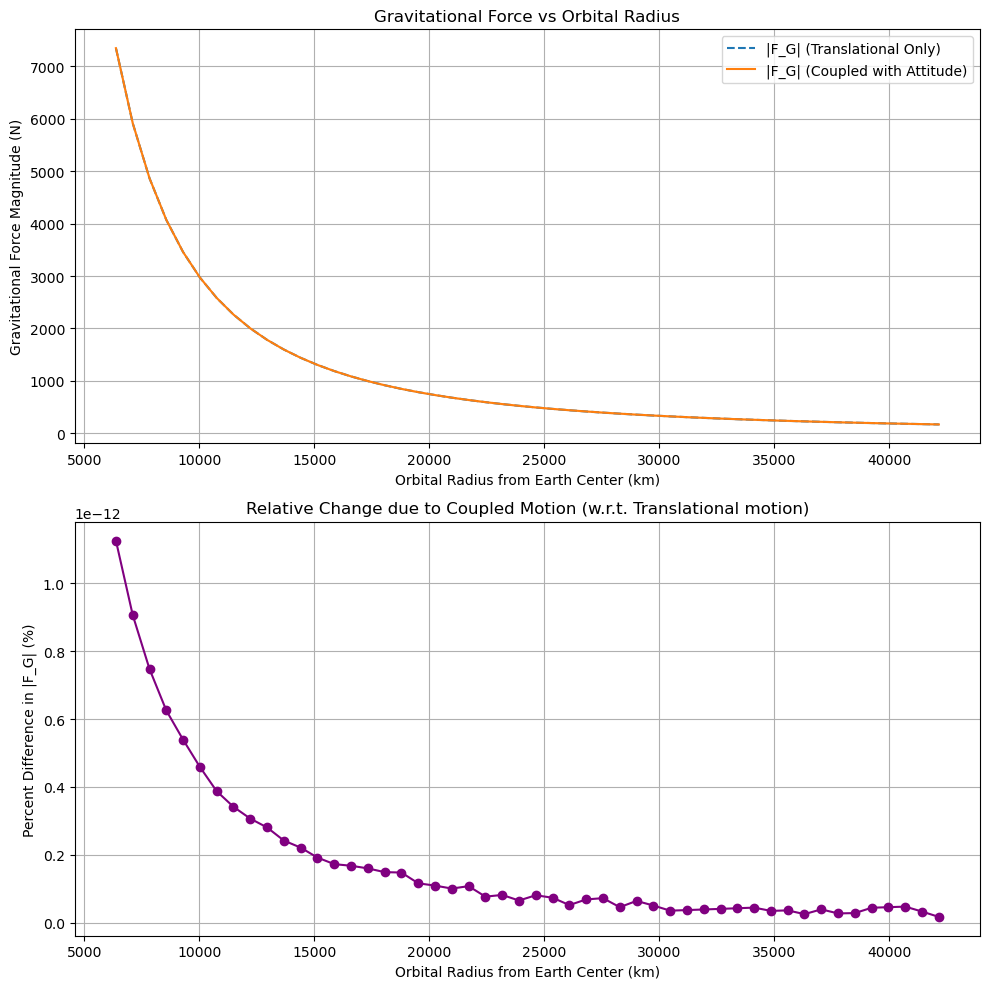

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=18, suppress=True)

# Constants
mu = 3.986004418e14    # m^3/s^2
earth_radius = 6378e3  # m
geo_radius = 42164e3   # m

# Spacecraft properties
m = 750
I_tensor = np.array([[650, 0  , 0],
                     [0  , 570, 0],
                     [0  , 0  , 500]])

I_trace = np.trace(I_tensor)
I_identity = np.eye(3)

# Function to compute gravitational gradient force VECTOR explicitly
def compute_FG_vector(R_c_vec, I_tensor, m):
    R_c_mag = np.linalg.norm(R_c_vec)
    i_r_hat = R_c_vec / R_c_mag
    
    FG_vector_coupled = - (mu * m / R_c_mag**3) * (np.eye(3) + (3 / (m * R_c_mag**2)) * (I_tensor + 0.5 * (I_trace - 5 * (i_r_hat.T @ I_tensor @ i_r_hat)) * np.eye(3))) @ R_c_vec
    FG_vector = -(mu * m / R_c_mag**3) * (1) * R_c_vec
    delta_vector = FG_vector_coupled - FG_vector

    #print(FG_vector_coupled)
    #print(FG_vector)
    #print(delta_vector)
    #print(np.linalg.norm(FG_vector_coupled))
    #print(np.linalg.norm(FG_vector))
    #print(np.linalg.norm(FG_vector_coupled) - np.linalg.norm(FG_vector))
    #print("")

    return FG_vector_coupled, FG_vector, delta_vector

# Create range of orbital radii along x-axis in ECI
R_c_magnitudes = np.linspace(earth_radius, geo_radius, 50)
FG_coupled, FG_translational, FG_percent_diff = [], [], []

for R in R_c_magnitudes:
    R_vec = np.array([R, 0, 0])  # Assume ECI x-direction
    F_coupled, F_trans, delta = compute_FG_vector(R_vec, I_tensor, m)
    
    mag_coupled = np.linalg.norm(F_coupled)
    mag_trans = np.linalg.norm(F_trans)
    mag_delta = np.linalg.norm(delta)
    
    FG_coupled.append(mag_coupled)
    FG_translational.append(mag_trans)
    FG_percent_diff.append(100 * mag_delta / mag_trans)

# Plot dual subplot
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Top plot: absolute magnitudes
axs[0].plot(R_c_magnitudes / 1e3, FG_translational, label='|F_G| (Translational Only)', linestyle='--')
axs[0].plot(R_c_magnitudes / 1e3, FG_coupled, label='|F_G| (Coupled with Attitude)', linestyle='-')
axs[0].fill_between(R_c_magnitudes / 1e3, FG_translational, FG_coupled, color='gray', alpha=0.2)
axs[0].set_xlabel('Orbital Radius from Earth Center (km)')
axs[0].set_ylabel('Gravitational Force Magnitude (N)')
axs[0].set_title('Gravitational Force vs Orbital Radius')
axs[0].legend()
axs[0].grid(True)

# Bottom plot: % difference
axs[1].plot(R_c_magnitudes / 1e3, FG_percent_diff, color='purple', marker='o')
axs[1].set_xlabel('Orbital Radius from Earth Center (km)')
axs[1].set_ylabel('Percent Difference in |F_G| (%)')
axs[1].set_title('Relative Change due to Coupled Motion (w.r.t. Translational motion)')
axs[1].grid(True)

plt.tight_layout()
plt.show()

The plot above shows the variation of gravitational force magnitude, $|\mathbf{F}_G|$, with respect to orbital radius from Earth's center. Two cases are plotted:

- **Translational Only**: This is the classic Newtonian gravitational attraction assuming the spacecraft is a point mass.
- **Coupled with Attitude**: This includes additional terms accounting for the spacecraft’s attitude and inertia tensor (i.e., gravity gradient coupling effects).

From the first plot, we observe that for a given orbital altitude, the gravitational force remains approximately constant — this assumes a uniform gravitational field and no variation in orbital height throughout the trajectory segmed Motion

The second plot quantifies the **percent difference** in gravitational force due to attitude coupling. It compares the coupled force against the purely translational force:

$$
\text{Percent Difference} = \frac{|\mathbf{F}_{\text{coupled}}| - |\mathbf{F}_{\text{translational}}|}{|\mathbf{F}_{\text{translational}}|} \times 100
$$

The relative change is extremely small — on the order of $10^{-12}\%$. This confirms that for typical spacecraft geometries and orbital distances, the additional forcing introduced by attitude-inertia coupling is **negligible** in the overall translational dynamics.

Nonetheless, this effect becomes conceptually significant in **precision orbit-attitude modeling** or when dealing with long-duration missions, flexible structures, or very sensitive force-torque models.

# 3.2) Relative Equilibria State

# 3.3) Linear Stability about Equilibria State